<a href="https://colab.research.google.com/github/scottspurlock/csc401-2021s/blob/main/labs/lab03_srs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3
## Scott Spurlock
### 2/16/2021


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
co_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1qtsEdMAS2xB9L1hQBfhwqO2ydepZE2rz', sep=',')
co_df.head(6)

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1
5,1955,6,Chrysler,2071.6,18.5


In [3]:
print(co_df.shape)
print(co_df.dtypes)
co_df.describe()

(25500, 5)
Year                       int64
Rank                       int64
Company                   object
Revenue (in millions)    float64
Profit (in millions)      object
dtype: object


,Year,Rank,Revenue (in millions)
count,25500.00000,25500.000000,25500.000000
mean,1980.00000,250.499765,4273.329635
std,14.71989,144.339963,11351.884979
min,1955.00000,1.000000,49.700000
25%,1967.00000,125.750000,362.300000
50%,1980.00000,250.500000,1019.000000
75%,1993.00000,375.250000,3871.000000
max,2005.00000,500.000000,288189.000000


In [4]:
# Use a regex to identify non-numeric values in profit column.
profit = co_df['Profit (in millions)']
bad = profit.str.contains('[^0-9.-]')
print('# non-numeric values: ', profit[bad].shape[0])


# non-numeric values:  369


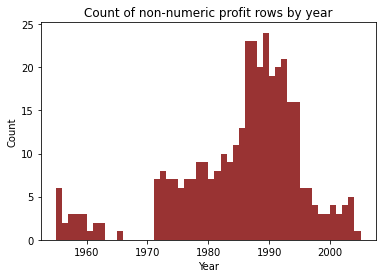

In [5]:
# Remember to go 1 past the desired end value
years = np.arange(co_df['Year'].min(), co_df['Year'].max()+1)

bad_years = co_df['Year'][bad]
plt.hist(bad_years, bins=years, color=[0.6, 0.2, 0.2])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of non-numeric profit rows by year')
plt.show()

In [6]:
# Invert the bad mask
good = ~bad

# Use the good mask to get rows to keep
df_clean = co_df[good]

df_clean.describe()

,Year,Rank,Revenue (in millions)
count,25131.000000,25131.000000,25131.000000
mean,1979.926784,249.744777,4304.961780
std,14.764827,144.443000,11396.723687
min,1955.000000,1.000000,49.700000
25%,1967.000000,124.000000,357.900000
50%,1980.000000,250.000000,1017.600000
75%,1993.000000,375.000000,3916.100000
max,2005.000000,500.000000,288189.000000


In [7]:
# The next line will cause the SettingWithCopyWarning: 
# "A value is trying to be set on a copy of a slice from the DataFrame"
#df_clean['Profit (in millions)'] = df_clean['Profit (in millions)'].astype(float)

# To bypass this warning, make an explicit copy of the dataframe
# This shows pandas that you know for sure that your update won't affect
# the original dataframe, co_df.
df_clean = df_clean.copy()
df_clean['Profit (in millions)'] = df_clean['Profit (in millions)'].astype(float)
df_clean.dtypes


Year                       int64
Rank                       int64
Company                   object
Revenue (in millions)    float64
Profit (in millions)     float64
dtype: object

In [8]:
df_clean.describe()

,Year,Rank,Revenue (in millions),Profit (in millions)
count,25131.000000,25131.000000,25131.000000,25131.000000
mean,1979.926784,249.744777,4304.961780,207.903677
std,14.764827,144.443000,11396.723687,1173.695947
min,1955.000000,1.000000,49.700000,-98696.000000
25%,1967.000000,124.000000,357.900000,8.900000
50%,1980.000000,250.000000,1017.600000,35.500000
75%,1993.000000,375.000000,3916.100000,150.500000
max,2005.000000,500.000000,288189.000000,25330.000000


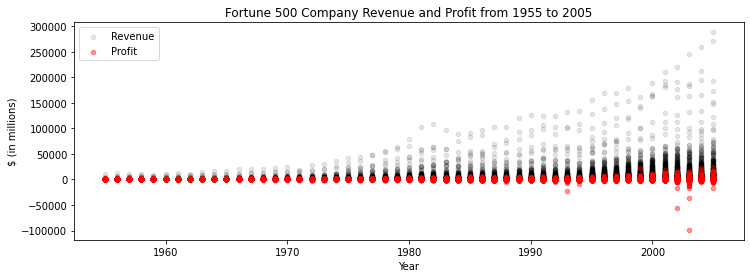

In [9]:
# Create a new figure with a given size (width, height)
fig = plt.figure(figsize=(12,4))

# Get a reference to the current axes object so we can plot two series to the same axis
ax = plt.gca()
df_clean.plot(x="Year", y="Revenue (in millions)", kind="scatter", c='k', alpha=0.1, ax=ax, label='Revenue')
df_clean.plot(x="Year", y="Profit (in millions)", kind="scatter", c='r', ax=ax, alpha=0.4, label='Profit')
plt.ylabel('$ (in millions)')
plt.legend()
plt.title('Fortune 500 Company Revenue and Profit from 1955 to 2005')
plt.show()

## Observations
- Both revenue and profit have increased over time
- Revenue has increased more than profit
- The variance of revenue and profit values has increased over time
- Only a few companies have lost a lot of money, primarily since 2000



# ===========================
# Challenges

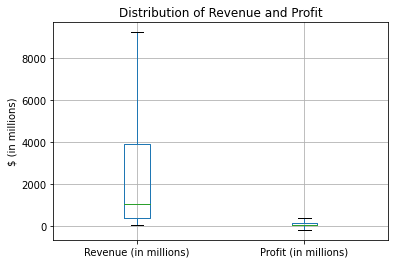

In [10]:
# Boxplots
df_clean.boxplot(column=["Revenue (in millions)","Profit (in millions)"], showfliers=False)
plt.title('Distribution of Revenue and Profit')
plt.ylabel('$ (in millions)')
plt.show()

In [11]:
corr = df_clean[['Year', 'Profit (in millions)', 'Revenue (in millions)']].corr()
corr

,Year,Profit (in millions),Revenue (in millions)
Year,1.000000,0.169832,0.365016
Profit (in millions),0.169832,1.000000,0.477046
Revenue (in millions),0.365016,0.477046,1.000000


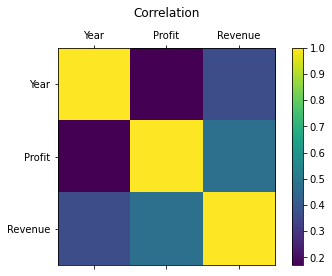

In [12]:
# Make a new figure
fig = plt.figure()
# Get a reference to the axes associated with the figure
ax = plt.gca()
# Show the corr matrix on that axis
cax = ax.matshow(corr)
# Show the color bar
fig.colorbar(cax)

labels = ['Year', 'Profit', 'Revenue']

ax.set_xticks([0, 1, 2])
ax.set_yticks([0, 1, 2])
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.title('Correlation', pad=20)

plt.show()

## Heatmap observations
The strongest correlation (other than pefect self correlation) is between revenue and profit.

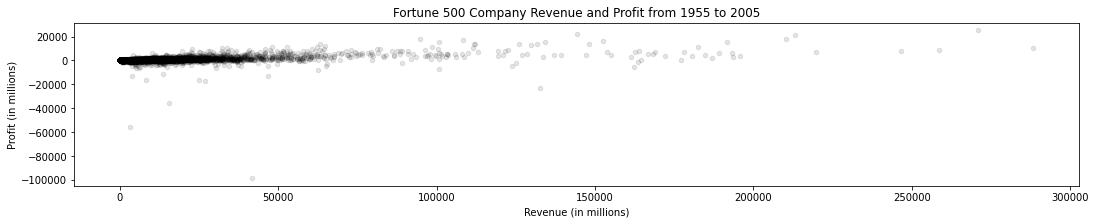

In [13]:
fig = plt.figure(figsize=(18,3))
ax = fig.add_subplot(111)
df_clean.plot(x="Revenue (in millions)", y="Profit (in millions)", kind="scatter", c='k', alpha=0.1, ax=ax)
plt.title('Fortune 500 Company Revenue and Profit from 1955 to 2005')
plt.show()

## Scatterplot observations
It makes sense that profit would be correlated with revenue, and we can see some evidence of this, but there appear to be a lot of outliers.

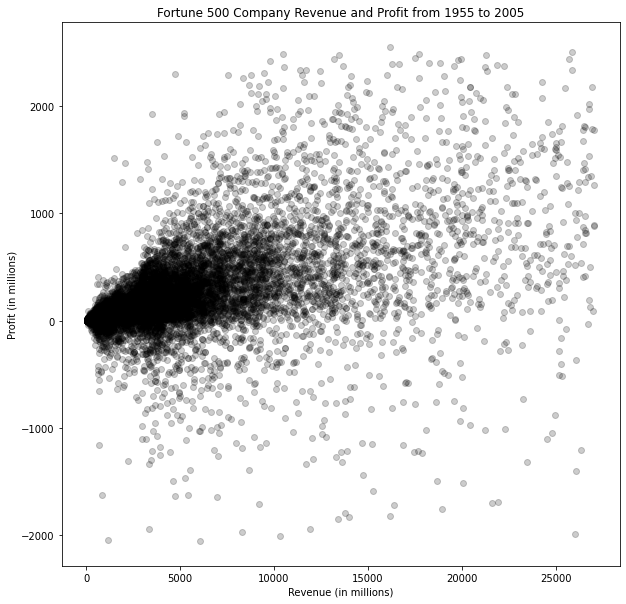


Correlation Coefficients


array([[1.        , 0.58981533],
       [0.58981533, 1.        ]])

In [14]:
# Z-score normalization (aka, standardization)
# Substract the mean and divide by the standard deviation.
revenue_norm = (df_clean['Revenue (in millions)'] - df_clean['Revenue (in millions)'].mean() ) / df_clean['Revenue (in millions)'].std()
profit_norm = (df_clean['Profit (in millions)'] - df_clean['Profit (in millions)'].mean() ) / df_clean['Profit (in millions)'].std()

# Remove outliers more tha 2 standard deviations from the mean
mask = (revenue_norm < 2) & (revenue_norm > -2) & (profit_norm < 2) & (profit_norm > -2)
rev_no_outliers = df_clean['Revenue (in millions)'][mask]
prof_no_outliers = df_clean['Profit (in millions)'][mask]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(rev_no_outliers, prof_no_outliers, c='k', alpha=0.2)
plt.title('Fortune 500 Company Revenue and Profit from 1955 to 2005')
plt.xlabel('Revenue (in millions)')
plt.ylabel('Profit (in millions)')
plt.show()

print('\nCorrelation Coefficients')
np.corrcoef(rev_no_outliers, prof_no_outliers)

## Observations
With outliers removed, there is a stronger correlation (0.5898), but still very noisy. Apparently there are other factors beyond revenue that affect profit.